We use the Original Wisconsin Breast Cancer Database from this website: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

In [14]:
# import the dataset
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
my_data = fetch_ucirepo(id=15)

# describe my_data
print(my_data.variables)

# data (as pandas dataframes)
X = my_data.data.features
y = my_data.data.targets

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

In [15]:
# prompt: How many missing values does Bare_nuclei have? Please check in X

# Check for missing values in 'Bare_nuclei' column
missing_values_count = X['Bare_nuclei'].isnull().sum()
print(f"Number of missing values in 'Bare_nuclei': {missing_values_count}")

Number of missing values in 'Bare_nuclei': 16


In [16]:
# Remove the missing values
X = X.dropna()
rows_to_keep = X.index
y = y.loc[rows_to_keep]

X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


I now suggest renaming the classes [2, 4] with [0, 1], because some functions that calculate metrics want the positive class to be shown as 1.

In [17]:
y = y.replace(2,0) # class=0 for benign
y = y.replace(4,1) # class=1 for malignant
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
694,0
695,0
696,1
697,1


In [18]:
#Create train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # It is good to set a random state to obtain reproducible results
print(X_train.shape[0])
print(X_test.shape[0])

478
205


In [19]:
# prompt: Train a logistic regression classifier on X_train

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier
logreg = LogisticRegression(random_state=42)

# Train the classifier
logreg.fit(X_train, y_train['Class'])

LogisticRegression(random_state=42)

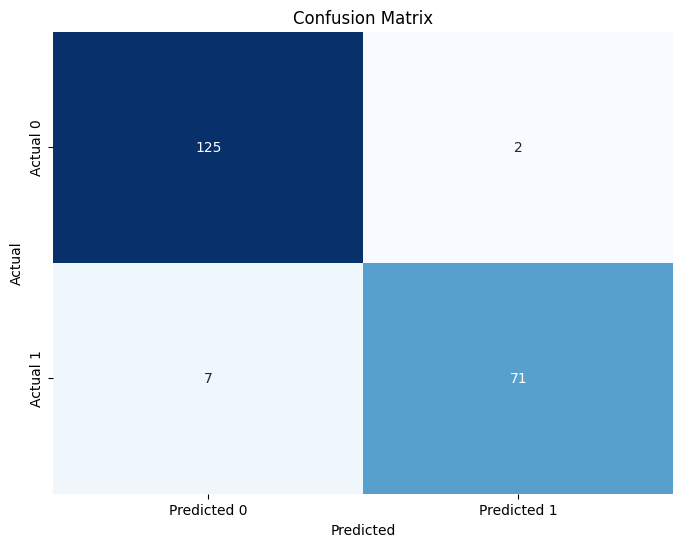

In [21]:
# prompt: Plot the confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# prompt: Calculate the accuracy, recall, specificity, precision and f1 on the test set

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate the precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Accuracy: 0.9560975609756097
Recall: 0.9102564102564102
Precision: 0.9726027397260274
F1 Score: 0.9403973509933775
Specificity: 0.984251968503937


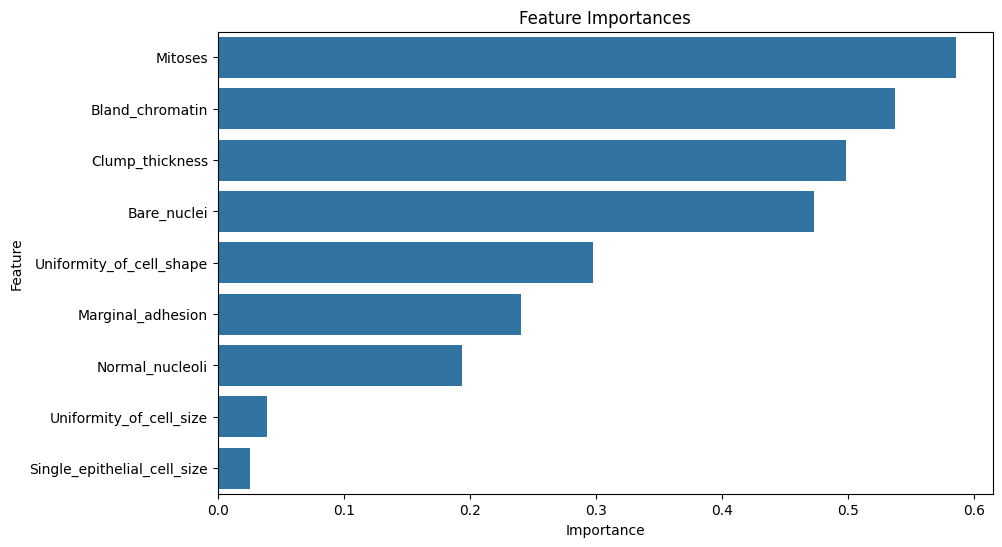

In [23]:
# prompt: Show and plot feature importances of the previous model

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(logreg.coef_[0])})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The last two features have coefficients much lower than the others. What would happen if you tried to train the model without the last two? Try it yourselves